# Explore here

In [ ]:
# Your code here

## Importación de librerías

In [2]:
import pickle
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import ( MinMaxScaler, LabelEncoder)
from sklearn.metrics import (
        accuracy_score,
        f1_score,
        matthews_corrcoef,
        classification_report,
        ConfusionMatrixDisplay)
from sklearn.inspection import permutation_importance
logger = logging.getLogger()
logger.setLevel(logging.ERROR)



### **1. Data loading** 
**Objective**: Obtain the data from source and get a first glimpse of their properties and presentation

In [6]:
df_raw = pd.read_csv('../data/raw/data.csv')


In [8]:
print(df_raw.head()) # Ver las primeras filas
print(df_raw.info()) # Información general: tipos de datos, valores no nulos
print(df_raw.shape) # Dimensiones del DataFrame
print(df_raw.describe(include='all')) # Estadísticas descriptivas

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [11]:
df_raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
df_raw.sample(10, random_state=2025) 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1085,2014-05-21 00:00:00,405000.0,3.0,1.75,2470,9620,1.0,0,1,4,1570,900,1962,0,1018 S 226th St,Des Moines,WA 98198,USA
1640,2014-05-30 00:00:00,735000.0,4.0,3.00,2840,4120,1.5,0,0,4,2060,780,1931,0,3849 Cascadia Ave S,Seattle,WA 98118,USA
2953,2014-06-20 00:00:00,950000.0,4.0,2.50,3360,11548,2.0,0,0,3,3360,0,1988,2000,4926 119th Pl NE,Kirkland,WA 98033,USA
837,2014-05-16 00:00:00,490000.0,2.0,1.00,1160,5000,1.0,0,0,4,1160,0,1937,0,7752 33rd Ave NW,Seattle,WA 98117,USA
1413,2014-05-27 00:00:00,263900.0,3.0,2.50,1658,2700,2.0,0,0,3,1658,0,2014,0,2150 S 262nd Ct,Des Moines,WA 98198,USA
1054,2014-05-21 00:00:00,199000.0,4.0,2.00,2030,8120,2.0,0,0,3,2030,0,1950,2005,11226 57th Ave S,Seattle,WA 98178,USA
727,2014-05-15 00:00:00,342400.0,3.0,2.25,1180,9630,2.0,0,0,3,1180,0,1986,0,8121 NE 147th Pl,Kenmore,WA 98028,USA
1349,2014-05-27 00:00:00,344950.0,4.0,2.00,2330,6250,1.0,0,0,4,1400,930,1941,1998,440 Scenic Way,Kent,WA 98030,USA
2583,2014-06-16 00:00:00,460000.0,2.0,1.00,890,2100,1.0,0,0,4,760,130,1919,1985,4008 2nd Ave NW,Seattle,WA 98107,USA
552,2014-05-13 00:00:00,530000.0,2.0,2.00,1680,4950,1.0,0,0,3,1680,0,2006,0,23726 NE 134th Pl,Redmond,WA 98053,USA


### **2. Data preprocessing** 
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [22]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower().str.replace(' ', '_').str.replace('.', '', regex=False)
df_baking['date'] = pd.to_datetime(df_baking['date'])
df_baking['street'] = df_baking['street'].astype('category')
df_baking['city'] = df_baking['city'].astype('category')
df_baking['statezip'] = df_baking['statezip'].astype('category')
df_baking['country'] = df_baking['country'].astype('category')
#df_baking['bedrooms'].fillna(df_baking['bedrooms'].median(), inplace=True)
df_baking = df_baking[df_baking['price'] > 0].copy()
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4551 non-null   datetime64[ns]
 1   price          4551 non-null   float64       
 2   bedrooms       4551 non-null   float64       
 3   bathrooms      4551 non-null   float64       
 4   sqft_living    4551 non-null   int64         
 5   sqft_lot       4551 non-null   int64         
 6   floors         4551 non-null   float64       
 7   waterfront     4551 non-null   int64         
 8   view           4551 non-null   int64         
 9   condition      4551 non-null   int64         
 10  sqft_above     4551 non-null   int64         
 11  sqft_basement  4551 non-null   int64         
 12  yr_built       4551 non-null   int64         
 13  yr_renovated   4551 non-null   int64         
 14  street         4551 non-null   category      
 15  city           4551 non-nu

In [34]:
print(df['country'].value_counts())
if df['country'].nunique() == 1:
     df.drop('country', axis=1, inplace=True)

country
USA    4551
Name: count, dtype: int64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4551 non-null   datetime64[ns]
 1   price                 4551 non-null   float64       
 2   bedrooms              4551 non-null   float64       
 3   bathrooms             4551 non-null   float64       
 4   sqft_living           4551 non-null   int64         
 5   sqft_lot              4551 non-null   int64         
 6   floors                4551 non-null   float64       
 7   waterfront            4551 non-null   int64         
 8   view                  4551 non-null   int64         
 9   condition             4551 non-null   int64         
 10  sqft_above            4551 non-null   int64         
 11  sqft_basement         4551 non-null   int64         
 12  yr_built              4551 non-null   int64         
 13  yr_renovated          4

### **3. Exploratory Data Analysis** 
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [23]:
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['age_at_sale'] = df['sale_year'] - df['yr_built']
df['yrs_since_renovation'] = df['sale_year'] - df['yr_renovated']
df.loc[df['yr_renovated'] == 0, 'yrs_since_renovation'] = 0 # O la edad de la casa
df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4551 non-null   datetime64[ns]
 1   price                 4551 non-null   float64       
 2   bedrooms              4551 non-null   float64       
 3   bathrooms             4551 non-null   float64       
 4   sqft_living           4551 non-null   int64         
 5   sqft_lot              4551 non-null   int64         
 6   floors                4551 non-null   float64       
 7   waterfront            4551 non-null   int64         
 8   view                  4551 non-null   int64         
 9   condition             4551 non-null   int64         
 10  sqft_above            4551 non-null   int64         
 11  sqft_basement         4551 non-null   int64         
 12  yr_built              4551 non-null   int64         
 13  yr_renovated          4

In [25]:
df['price'].value_counts()

price
300000.0     42
400000.0     31
450000.0     29
440000.0     29
600000.0     29
             ..
288350.0      1
1339000.0     1
1635000.0     1
609900.0      1
307550.0      1
Name: count, Length: 1740, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame original limpio
# Elimina stratify=df['price'] de ambas divisiones

# Primera división: Entrenamiento y Prueba
df_train, df_test = train_test_split(df, 
                                     test_size=0.3, 
                                     random_state=2025) # Se elimina stratify

# Segunda división: Entrenamiento (más pequeño) y Validación (a partir del df_train original)
df_train, df_val = train_test_split(df_train, 
                                    test_size=0.20, # Esto será 0.20 del 70% original = 14% del total
                                    random_state=2025) # Se elimina stratify

# Resetear los índices
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Verificar las formas de los DataFrames resultantes
print("Forma de df_train:", df_train.shape)
print("Forma de df_val:", df_val.shape)
print("Forma de df_test:", df_test.shape)

# Verificación de los porcentajes aproximados:
# df_train debería ser aproximadamente el 56% del original (0.7 * 0.8)
# df_val debería ser aproximadamente el 14% del original (0.7 * 0.2)
# df_test debería ser el 30% del original
print(f"Porcentaje de entrenamiento: {len(df_train) / len(df):.2%}")
print(f"Porcentaje de validación: {len(df_val) / len(df):.2%}")
print(f"Porcentaje de prueba: {len(df_test) / len(df):.2%}")

Forma de df_train: (2548, 23)
Forma de df_val: (637, 23)
Forma de df_test: (1366, 23)
Porcentaje de entrenamiento: 55.99%
Porcentaje de validación: 14.00%
Porcentaje de prueba: 30.02%


In [30]:
display(df_train.describe(include='number').T) 
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
price,2548.0,558938.457928,675228.926415,80000.00,327875.00,466900.00,655000.0,26590000.0
bedrooms,2548.0,3.395212,0.897806,1.00,3.00,3.00,4.0,8.0
bathrooms,2548.0,2.151001,0.758240,0.75,1.75,2.25,2.5,6.5
sqft_living,2548.0,2120.323783,919.978437,380.00,1470.00,1970.00,2600.0,10040.0
sqft_lot,2548.0,15228.247645,38476.308137,704.00,5052.25,7700.00,11010.0,1074218.0
floors,2548.0,1.502355,0.530198,1.00,1.00,1.50,2.0,3.0
waterfront,2548.0,0.005887,0.076515,0.00,0.00,0.00,0.0,1.0
view,2548.0,0.209969,0.710200,0.00,0.00,0.00,0.0,4.0
condition,2548.0,3.444270,0.666986,1.00,3.00,3.00,4.0,5.0
sqft_above,2548.0,1816.160126,828.388213,380.00,1197.50,1600.00,2300.0,7680.0


,count,unique,top,freq
street,2548,2525,2500 Mulberry Walk NE,3
city,2548,43,Seattle,867
statezip,2548,77,WA 98052,84
country,2548,1,USA,2548


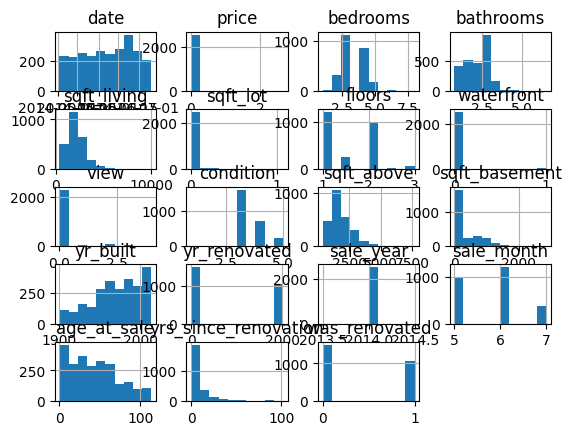

In [32]:
df_train.hist()
#plt.tight_layout()
plt.show() 


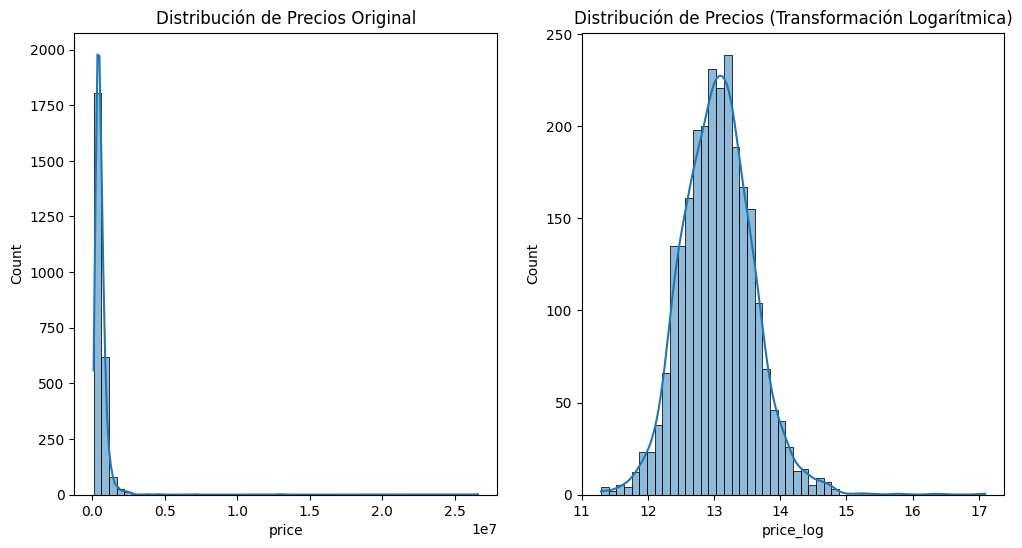

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Para la transformación logarítmica

# Asumiendo que has filtrado los precios <= 0 si decidiste hacerlo
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_train['price'], kde=True, bins=50)
plt.title('Distribución de Precios Original')

# Considerar una transformación logarítmica si está muy sesgada
df_train['price_log'] = np.log1p(df_train['price']) # log1p maneja ceros si los mantuviste y les sumaste un epsilon
plt.subplot(1, 2, 2)
sns.histplot(df_train['price_log'], kde=True, bins=50)
plt.title('Distribución de Precios (Transformación Logarítmica)')
plt.show()

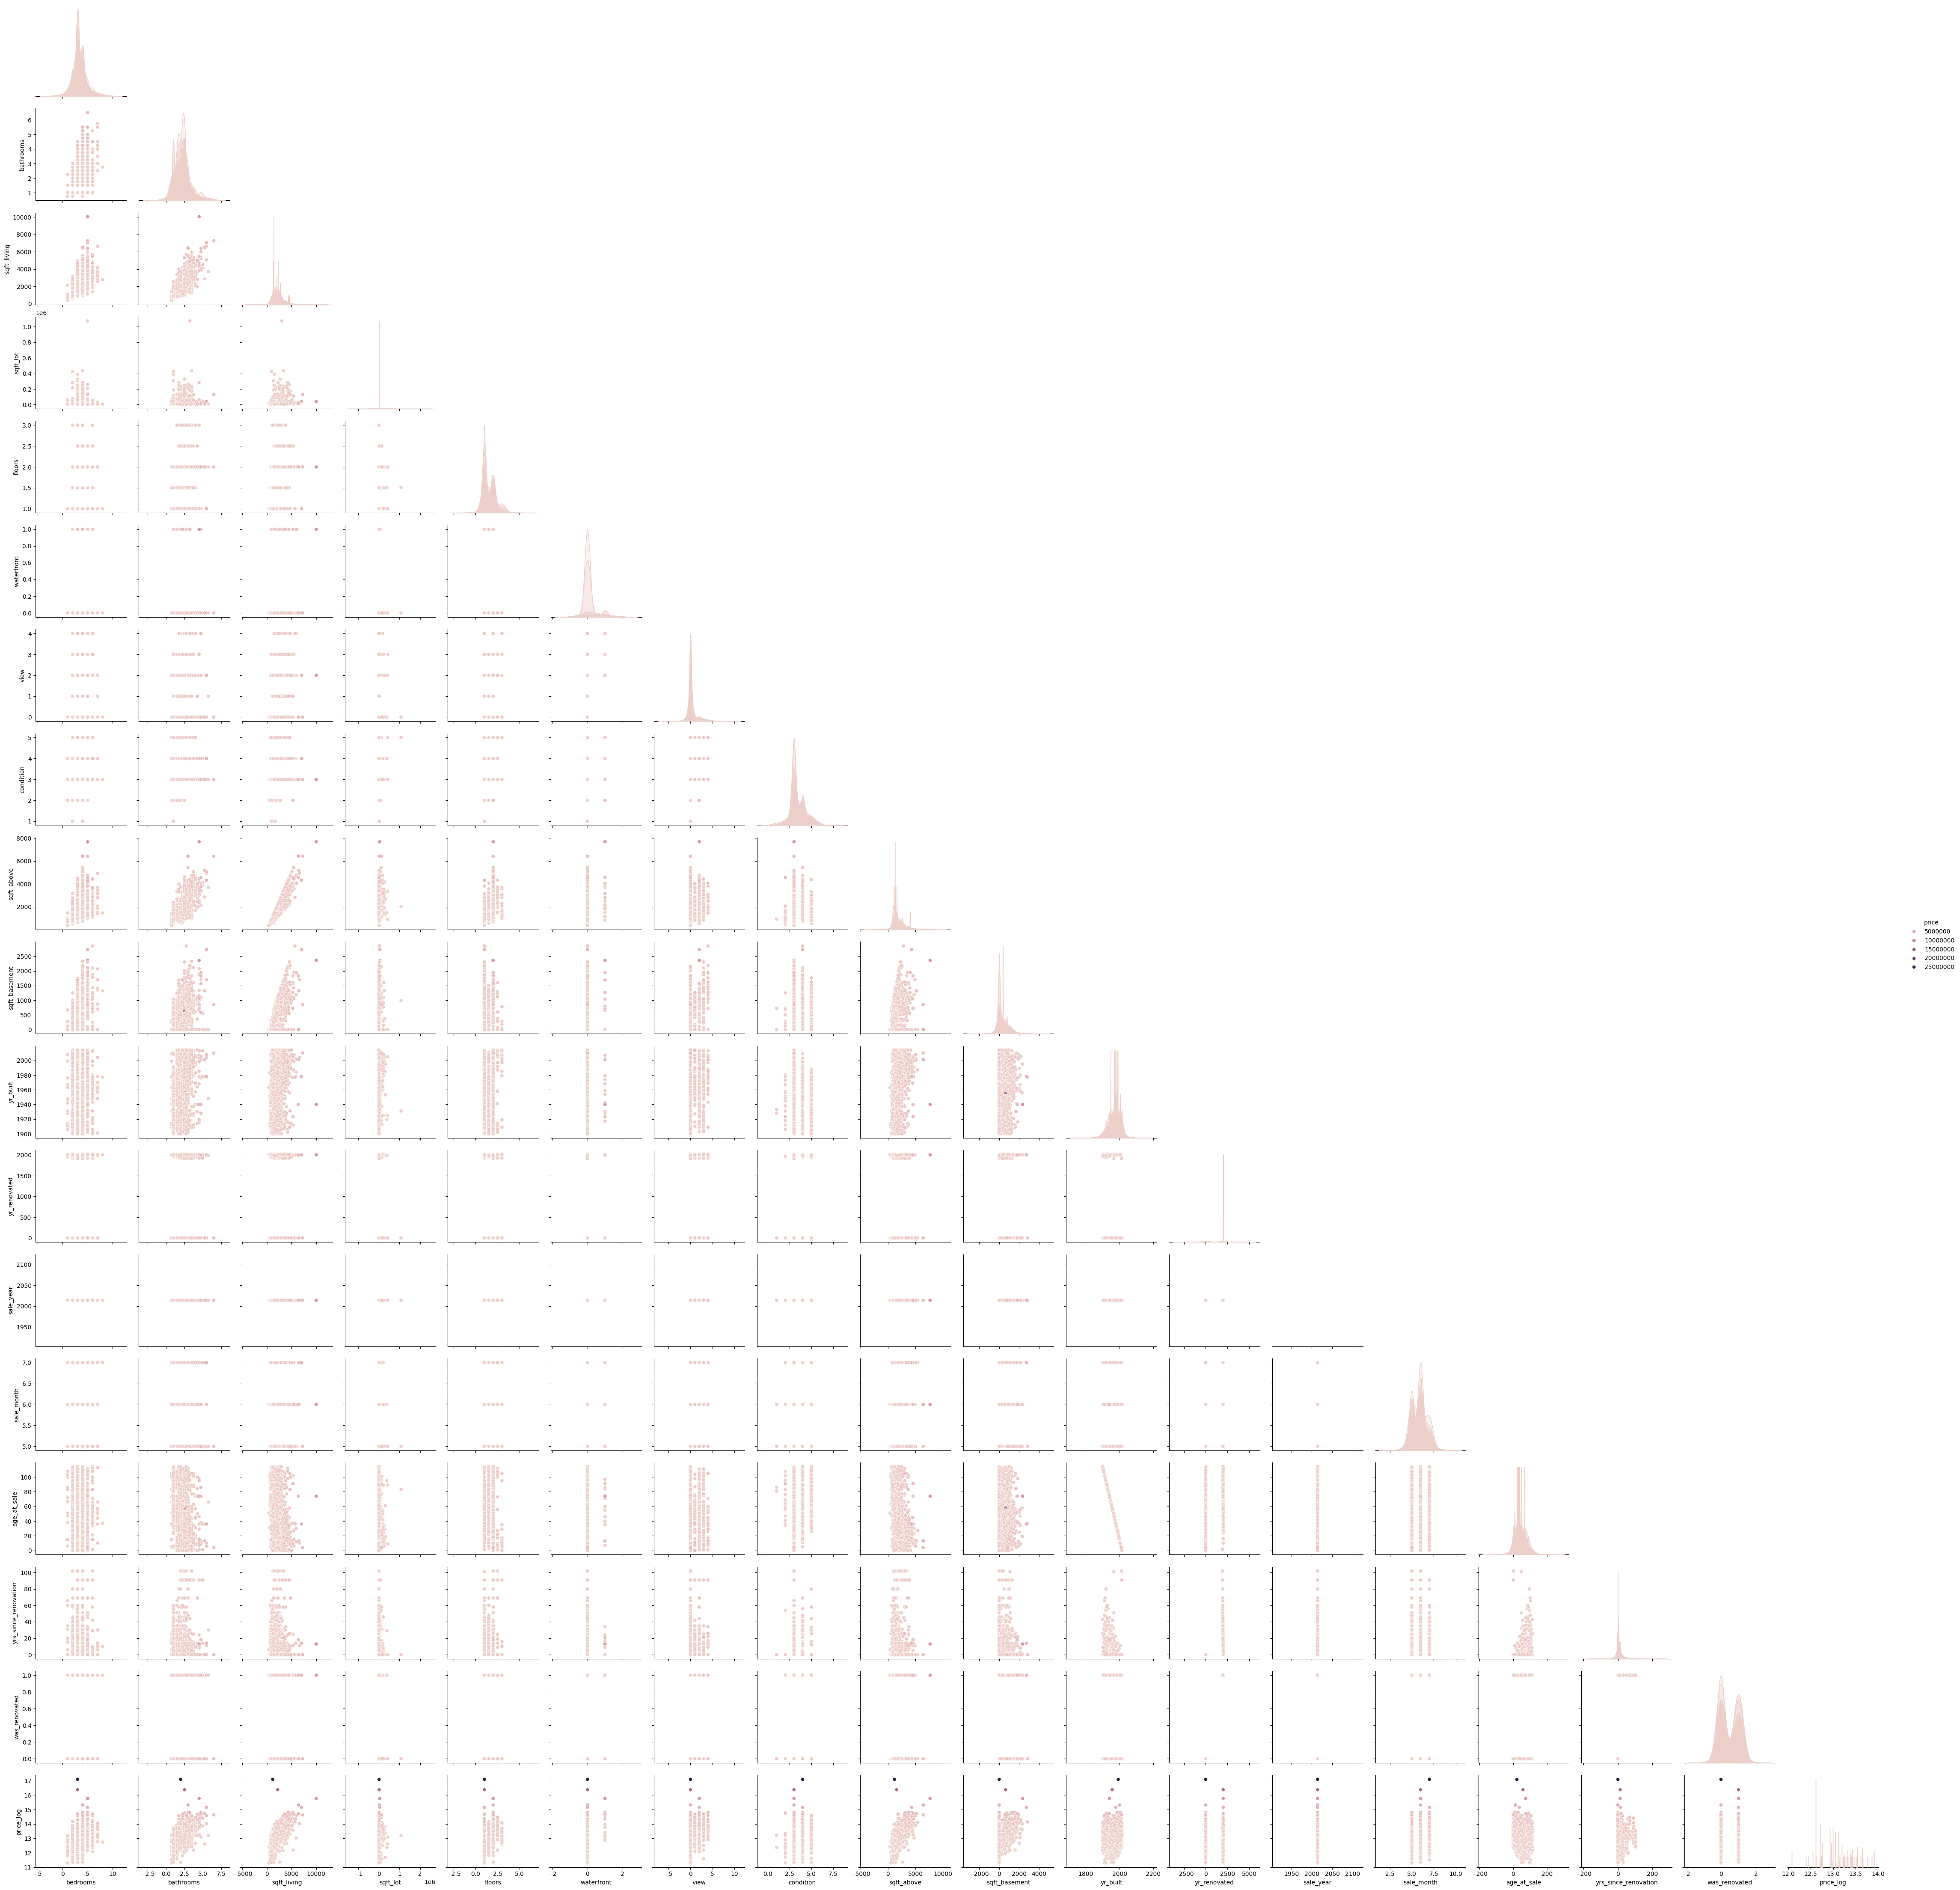

In [36]:
# análisis bivariado
sns.pairplot(df_train,hue = "price", corner=True)
plt.show()


In [ ]:
df_train.drop(columns=['']).corr(), 
        vmin=-1, vmax=1, annot=True, cmap='RdBu'
)
plt.show()


In [ ]:

correlation_matrix = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f'
plt.title('Matriz de Correlación')
plt.show()

SyntaxError: '(' was never closed (2439367697.py, line 3)